<h1><center> NLP - Bag of Words, spaCy </center></h1>

### From:
- https://medium.com/analytics-vidhya/fundamentals-of-bag-of-words-and-tf-idf-9846d301ff22
- https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af

***Linked with 'NLP_Logistic-Regression.ipynb' file***

## *Written by Nathanael Hitch*

# Bag of Words
Bag-of-Words (BoW) is a popular, simple method of feature extraction with text data.<br>
The problem with modeling text is that it is messy; techniques like machine learning algorithms prefer well defined, fixed-length inputs and outputs.<br>
Machine learning algorithms can't work with raw text directly; the text must be converted into numbers, specifically, vectors of numbers.

Simply put: similar text must result in closer vector.

In this model, text (sentence or a document) is represented as the bag of words; it disregards grammar and word order but keeps multiplicity (the number of times a word appears in the 'bag'). BoW models is commonly used in document classification methods, where the frequency of each word is used as a feature for training a classifier.

The model involves 2 things;

**1. A vocabulary of known words:**<br>
constructing a document corpus (a collection of written texts), consisting of unique words in the whole text. Similar to a dictionary with each index corresponding to word.

Example: 4 reviews for an Italian pasta dish:

- This pasta is vert tasty and affordable.
- This pasta is not tasty and is affordable.
- This past is delicious and cheap.
- Pasta is tasty and pasta tastes good.

Counting: there are 12 unique words.

**2. A measure of the presense of known words**<br>
Taking the first review, we can plot the count of each unique word for each review.

<img src="Images\Unique_words_count.png">

<center>Top row = index for a unique word; Second row = the count for that word.</center>

## Comparisons

Converting these reviews into vectors means that we can compare difference sentences, calculating the *Euclidean distance* between them.<br>
This checks how similar 2 sentences are; no common words means a much larger distance.

BoW doesn't work well with small changes in terminology, the reviews all have similar meanings just different words, resulting in a vector with a lot of zeros, a sparse vector. These require more memory and resources when modeling.<br>
Hence it is better to decrease the size of the vocabulary when using BoW models, i.e. clean up the text:

- ignore case
- ignore punctuation
- remove stopwords
- fix misspelt words
- reduce words to their stem, Lemmatisation

### N-grams Model:

These are more sophisticated as they create a vocabulary of grouped words, allowing BoW to capture more meaning from the document with each word or token a 'gram'.

"*An N-gram is an N-token sequence of words: a 2-gram (or 'bigram') is a two-word sequence of words like “please turn”, “turn your”, or “your homework”. A 3-gram (more commonly called a trigram) is a three-word sequence of words like “please turn your”, or “turn your homework”"*.

## Example use of Bag of Words and N-grams

To build a representation of our vocabulary, we will use a Vectorizer to convert them into a numerical structure. Each vectoriser will:

- Split the document into tokens.
- Assign a weight to each token proportional to the frequency with which it shows up in the document.
- Creating a document-term matrix: row = a document, column = a token.

There are 3 common types of vectorisers:

- CountVectorizer: most straightforward, it counts the number of times a token appears in the document using its value as a weight.

- HashVectorizer: designed to be as memory efficient as possible; the vectorizer applies the hashing trick to encode tokens as numerical indexes rather than strings. The downside is that once vectorised, the features’ names can no longer be retrieved.

- TF-IDF Vectorizer: *more on this below*; the weight assigned to each token depends on its frequency in a document, but also how recurrent that term is in all the documents.

From: *https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools*

The example below, from neptune.ai (above link), also has a few charts to show its counts

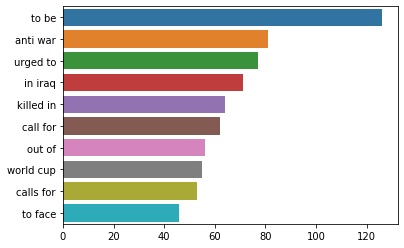

In [19]:
import pandas as pd
import seaborn as sns

news = pd.read_csv('Files/abcnews-date-text.csv',nrows=10000)
# Read .csv file

def get_top_ngram(corpus, n=None):
# corpus = collection of documents - n = the size of the n-gram (2 = bigram)
    
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(news['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In the news headlines, *Bigrams* such as 'anti war' and 'killed in', that are related to war, dominate.

### Customise Vectoriser<br>https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af

While each vectoriser comes with its own preprocesor, tokeniser and analyser, you can assign a custom one if needed:

- build_preprocessor: used to preprocess the input text before tokenization.
- build_tokenizer: a function that splits a document into tokens.
- build_analyzer: a function that applies preprocessing, tokenisation, removes stopwords and creates n-grams.

Example below - function won't actually work

In [ ]:
custom_vec = CountVectorizer(preprocessor=my_preprocessor,
                             tokenizer=my_tokenizer,
                             ngram_range=(1,2),
                             stop_words='english')

**E.g.** the code below uses a custom function (spacy_cleaner) that  tokenises but also lemmatisises and puts the words into lower case. With words in their base form (testing/tested -> test), it makes classification of documents easier.

`The 'spacy_cleaner function (below) was taken from 'NLP_Logistic-Regression.ipynb'`

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import string # Contains a useful list of punctuation marks.
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

############################### Tokeniser for BoW ###############################

nlp = spacy.load("en_core_web_sm")

punctuations = string.punctuation
# Create list of punctuation marks

def spacy_cleaner(sentence):
    
    print("Input sentence:\n", sentence,"\n")
    
    doc = nlp(sentence)
    # Pass text into model's pipeline.
    
    myTokens = [token for token in doc]
    # Creating a list of the words in the sentence.
    print("Sentence tokenised:\n", myTokens,"\n")
    
    myTokens = [token for token in myTokens if token.is_stop == False and token.text not in punctuations]
    # List of words without stopwords or punctuations.
    print("Sentence without stopwords or punctuations:\n", myTokens, "\n")
    
    myTokens = [token.lemma_.strip().lower() if token.pos_ != "PROPN" else token.lemma_.strip() \
                for token in myTokens]
    # Words are lemmatised, spaces at end removed and (if not a proper noun) lowercased.
    
    print("Sentence lemmatisted, no spaces and lowercase (except Proper Noun):\n", myTokens, "\n")
    
    return myTokens
    
spacy_cleaner("This is a test sentence, for testing tests from London.")

Input sentence:
 This is a test sentence, for testing tests from London. 

Sentence tokenised:
 [This, is, a, test, sentence, ,, for, testing, tests, from, London, .] 

Sentence without stopwords or punctuations:
 [test, sentence, testing, tests, London] 

Sentence lemmatisted, no spaces and lowercase (except Proper Noun):
 ['test', 'sentence', 'test', 'test', 'London'] 



['test', 'sentence', 'test', 'test', 'London']

In [13]:
############################## Vectoriser using BoW #############################

# We are using the 'spacy_cleaner' function as the tokeniser

bow_vector = CountVectorizer(tokenizer = spacy_cleaner, ngram_range=(1,1))
# Bag-of-Words n-gram matrix

# TF-IDF - Term Frequency - Inverse Document Frequency

TF-IDF is a "*numerical statistic intended to show how important a word is in a document in a collection or corpus*".<br>
The concept **counts** the number of times the word appears in a document and figures out the **frequency** that the word ($w_i$) appears in a document out of all the words in the document ($r_i$):

\begin{equation}
TF(w_i,r_i) = \frac{No.-of-times-w_i-occurs-in-r_i}{Total-no.-of-words-in-r_i}
\end{equation}

TF is basically the *probability of finding a word in a document*.

The TF-IDF value:

- increases proportional to the number of times it appears in the document.
- is offset by the number of documents in the corpus that contain the word.

Th Inverse Document Frequency is a *measure of how much information the word provides*, if it's common or rare across ALL documents. Words that occur rarely over the documents have a high IDF score. It is logarithmically scaled:

\begin{equation}
IDF(w_i,D) = \log{\frac{N}{|{d \in D:w_i \in d}|}} = \log{\frac{Total-No.-of-docs}{No.-of-docs-containing-w_i}}
\end{equation}

The actual **TF-IDF** value is simply TF multiplied by IDF:

<center>$TF(w_i,r_i) = IDF(w_i,D)$</center>

A high weight in tf–idf is reached by a high frequency of the term in the given document, but a low document frequency of the term in the whole collection of documents. Hence, the weights hence tend to filter out common terms.

**Fun Maths**: the fraction inside IDF's log function is always $\ge$ 1, hence the value of IDF, and TF-IDF, is $\ge$ 0. As a term appears in more documents, it brings the IDF and tf–idf closer to 0.

**Basically:**
***
- `It's a way of representing how important a particular term is in the context of a given document, based on how many times the term appears and how many other documents that same term appears in.`
-`The higher the TF-IDF, the more important that term is to that document.`
- `TF-IDF gives larger values for less frequent words in a collection (corpus) of documents`
- `A high value occurs when both TF and IDF values are high: the word is rare in the collection but frequent in a document`
- `However, TF-IDF does not take the semantic meaning of the words`
***

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(tokenizer = spacy_cleaner)
# TF-IDF result

<hr>

**Both of these forms of Bag-of-Words can be used in the pipeline for a model.<br>
*E.g. NLP_Logisitic-Regression.ipynb***